<a href="https://colab.research.google.com/github/JoshuaPaul-lasisi/Customer_segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: Customer Segmentation

**Executive Summary**

This project leverages customer data to identify distinct segments within our customer base. By analyzing purchasing behavior, demographics, and other relevant factors, we aim to uncover hidden patterns and trends. These insights will inform targeted marketing strategies, improve customer engagement, and ultimately drive business growth.

**Challenges and Opportunities**

Traditional customer segmentation approaches might not fully capture the nuances of our customer base. This project aims to overcome these limitations by utilizing advanced data analysis techniques to identify more granular and actionable segments.

**Project Objectives**

* **Develop customer segments:**  We will identify distinct customer groups based on shared characteristics and behaviors.
* **Segment profiling:** Create detailed profiles of each segment, including key demographics, purchase patterns, and potential needs.
* **Tailored marketing strategies:** Formulate targeted marketing approaches and messaging specific to each segment for increased effectiveness.

**Methodology**

We will employ a data-driven approach to customer segmentation:

* **Data Preparation:** Cleanse, transform, and prepare the data for analysis.
* **Exploratory Data Analysis (EDA):**  Analyze the data to understand its distribution, characteristics, and relationships between variables.
* **Segmentation Techniques:**  Implement various segmentation techniques (e.g., K-Means clustering, RFM analysis) to identify customer segments.
* **Model Evaluation:** Evaluate the effectiveness of different segmentation models and select the most suitable one.

**Expected Deliverables**

* **Customer Segmentation Model:** A robust and validated customer segmentation model that accurately identifies distinct customer groups.
* **Segment Profiles:** Detailed descriptions of each customer segment, including key attributes, needs, and behavior patterns.
* **Actionable Insights:** Data-driven insights and recommendations to inform targeted marketing strategies, improve customer engagement, and optimize resource allocation.

**Project Benefits**

* **Enhanced Customer Targeting:** Reach the right customers with the right message at the right time.
* **Improved Customer Retention:** Identify and engage at-risk customers to prevent churn.
* **Increased Customer Lifetime Value (CLTV):** Maximize the long-term value of each customer segment.
* **Data-Driven Decision Making:** Make informed decisions based on customer insights.

**Success Criteria**

* **Actionable customer segments:** Segments are clearly defined and provide meaningful insights for marketing and business strategies.
* **Improved customer engagement:** Increased customer loyalty and reduced churn.
* **Data-driven recommendations:** Insights translate into actionable marketing strategies.


Necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


...and the dataframe to be used


In [2]:
# Second Dataframe used in the kaggle we went through in our meeting
df = pd.read_csv('https://raw.githubusercontent.com/sheidheda/SusAc-ML-Files/main/cs_data2.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Project Strategy

**Columns:**

* InvoiceNo: Unique identifier for each invoice (transaction)
* StockCode: Product code
* Description: Brief description of the product
* Quantity: Number of units purchased in each invoice
* InvoiceDate: Date of the invoice (transaction)
* UnitPrice: Price per unit of the product
* CustomerID: Unique identifier for each customer
* Country: Customer's country

**Segmentation Strategies based on available data:**

1. **Purchase Behavior:**

    - **Monetary Value:**
        - Calculate total purchase amount per customer (high spenders vs. low spenders). You can achieve this by multiplying the quantity purchased by the unit price and summing it across all invoices for each customer.
    - **Purchase Frequency:**
        - Segment by the number of invoices per customer (frequent buyers vs. occasional buyers). This helps identify how often customers typically purchase.
    - **Recency:**
        - Calculate the difference between the invoice date (`InvoiceDate`) and today's date. You can identify recent buyers and dormant customers using this time since the last purchase metric.

2. **Product Affinity (if applicable):**

    - **Product Category (if inferable from descriptions):**
        - You might be able to infer product categories based on the product descriptions. For instance, descriptions containing "running shoe" or "sneaker" could be categorized as "athletic footwear." Segmenting by these categories can reveal customer preferences for certain product types.
    - **Frequently Bought Together:**
        - Analyze purchase history to see which products are frequently purchased together. This can help identify groups with similar buying habits. However, this might require a larger dataset for robust analysis.

3. **Geographic Segmentation:**

    - **Country:**
        - Segment by customer location (country) for targeted marketing campaigns. This can be useful if you have products or promotions relevant to specific regions.

**Next Steps:**

1. **Data Cleaning and Exploration:**
    - Ensure data consistency (e.g., missing values, typos).
    - Explore data distribution and relationships between variables to understand customer behavior patterns.

2. **Feature Engineering (optional):**
    - Create new features from existing data that might be more insightful for segmentation (e.g., average order value, total items purchased per customer).

3. **Segmentation Techniques:**
    - Implement chosen segmentation techniques based on your goals (e.g., K-Means clustering for purchase behavior segmentation, RFM analysis for combined recency, frequency, and monetary analysis).

4. **Evaluation and Refinement:**
    - Evaluate the effectiveness of your segmentation and refine the model or chosen techniques as needed.

5. **Actionable Insights:**
    - Translate segmentation results into actionable strategies for marketing, customer engagement, and potentially product development.

# Data Loading & Cleaning

This section of the notebook focuses on preparing the dataset for analysis by loading it into the environment and performing initial data cleaning steps. These steps are crucial to ensure that the data is in a usable format and free from any inconsistencies that could affect the analysis results. This section will address any missing values, outliers, and duplicates in the dataset, ensuring that the data is clean and ready for further analysis.

______________________________________
### Peeking under the hood of the data



We get a quick glance of the data. Why?

To check:
- How big the data is
- the kind of data in each column
- to check for possible missing values
- to check how much space our data takes

In [3]:
#checking the info for df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We now have answers to our questions:
- **Data size** -> 541,909 entries
- **Kind of data** -> the dataset contains a mix of data types
- **Possible missing values** -> Description and CustomerID have non-null counts less than the total number of entries. This indicates that there might be missing values in these columns
- **Space data takes** -> Memory usage is approximately 33.1+ MB


A more concise depiction of our dataset inspecting the dimensions of our dataset shows our dataset is **large** with 541,909 columns and 8 columns as seen below


In [4]:
df.shape

(541909, 8)

The **CustomerID** column should not be a float but a string since it is an identifier that could have leading zeros especially for older customers.

We will therefore convert it to string and remove the decimal point

In [5]:
df['CustomerID'] = df['CustomerID'].astype(str).str[:-2]

The **Quantity** ordered should not be less than zero for it to get into an invoice. But just in case, we will check it...

In [6]:
# to check whether quantity column has negative values
if (df['Quantity'].unique() <0).any():

  print("there is presence of Negative values")

there is presence of Negative values


This shows that we have **refunds** in our dataset. We will consider this is in our **segmentation**.

## Sorting out duplicates

The next step is to consider if we have any duplicates in the data.

For large data like this, we will employ the **.duplicate()** function which shows columns with repeated values for all columns.

In [7]:
# Identify rows with duplicate values across all columns in df2
duplicates = df[df.duplicated()]

# Count the number of duplicate rows
number_of_duplicates = len(duplicates)

# Print a message to inform the user about the results
print(f"The DataFrame df has {number_of_duplicates} duplicate rows.")

The DataFrame df has 5268 duplicate rows.


...to view them

In [8]:
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446,United Kingdom


Considering that they are redundancies, we will remove them **completely** from the dataframe.

In [9]:
# Drop the duplicates
df.drop_duplicates(inplace = True)

Our next course of action is to confirm if we have any missing values in our dataset.

To specify which columns have missing values...

##  Correcting missing values

In [10]:
# Check for missing values in df2
missing_values = df.isnull().sum()

# Calculate missing value percentages as a ratio (avoiding data type issues)
missing_percentages = (missing_values / len(df)) * 100

# Print a summary of missing values for each column
for col in df.columns:
  # Check if there are any missing values (avoiding unnecessary comparisons)
  if missing_values[col] > 0:
    print(f"Column '{col}' has {missing_values[col]} missing values ({missing_percentages[col]:.2f}%)")

Column 'Description' has 1454 missing values (0.27%)


We find that the **Description** and **CustomerID** columns have 1454 and 135037 missing values respectively.

Since CustomerID identifies the customer and Description identifies the product, let's see if there are cases where both product and customer are not identified

In [11]:
# columns with both description and CustomerID as null
no_id_desc = df[(df['Description'].isnull()) & (df['CustomerID'].isnull())]
no_id_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We are **positive** that there are such columns and we also notice that they are the **exact same amount** as the amount of missing values in the Description column.

We can conclude that this is a subset of the rows with missing customer identifiers.

Another **observation** is that some of our unit prices are **zero**. Let's check how many...

In [12]:
no_id_desc['UnitPrice'].unique()

array([], dtype=float64)

**All of them!!!!**
Since there is not unit price, it means there is no sale.

When there is no sale, there is no customer.

This part of the data therefore adds no value to our **customer segmentation** then.

We will continue without them.

In [13]:
df_null = df[-df['Description'].isnull()]

Now we check how many null values we have left in the dataset

In [14]:
df_null.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df_null['CustomerID'].fillna('Null', inplace = True)

df_null.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_8324\2079389659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_null['CustomerID'].fillna('Null', inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8324\2079389659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['CustomerID'].fillna('Null', inplace = True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## The finished work

In [16]:
df_cleaned = df_null

df_cleaned.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


# Exploratory Data Analysis

We can look through the data to get necessary informartion for segmentation. Based on the columns in our df_cleaned, we can explore:

**Location**:

- Customer Locations (Country)

**Behavior**:

- Common Purchase Categories/Products
- Average Order Value and Frequency

## Customer Location Distribution

Since we only have the Country column to work with as regards location, we can analyze the frequency distribution of countries tounderstand the geographic spread of customers


To analyze the distribution of countries where invoices originate.
- Are there dominant regions?
- Are there any under-represented areas with potential growth opportunities?

In [17]:
# Taking stock of the countries
country_counts = df_cleaned['Country'].value_counts()

# Print the distribution of countries (number of invoices from each country)
print(country_counts)

Country
United Kingdom          488846
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


To visualize this on one bar chart would be unreasonable. We will therefore group them into three secluding the result of United Kingdom considering it is overwhelmingly higher than others.

Firstly, we define a function

In [18]:
def plot_series_subset(data_series, lower_limit, upper_limit):
  """
  This function creates a bar chart for a subset of a pandas Series based on upper and lower limits.

  Args:
      data_series (pandas.Series): The pandas Series containing the data.
      lower_limit (int/float): The lower limit for the subset (inclusive).
      upper_limit (int/float): The upper limit for the subset (exclusive).
      title (str, optional): The title for the chart. Defaults to "Series Distribution".
      xlabel (str, optional): The label for the x-axis. Defaults to "Index".
      ylabel (str, optional): The label for the y-axis. Defaults to "Values".
      color (str, optional): The color for the bars in the chart. Defaults to 'skyblue'.
  """

  # Subset the data series based on limits
  subset_data = data_series[(data_series >= lower_limit) & (data_series < upper_limit)]

  # Create the chart with error handling (in case subset is empty)
  if not subset_data.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data.index, subset_data.values, color='orange')
    plt.title("Distribution of Invoices by Countries", fontsize=16)
    plt.xlabel(f"Countries with invoices from {lower_limit} to {upper_limit}", fontsize=14)
    plt.ylabel('Number of Invoices', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
  else:
    print("No data points within the specified limits. Please adjust the limits or check the data series.")


### 1. Groups below 100

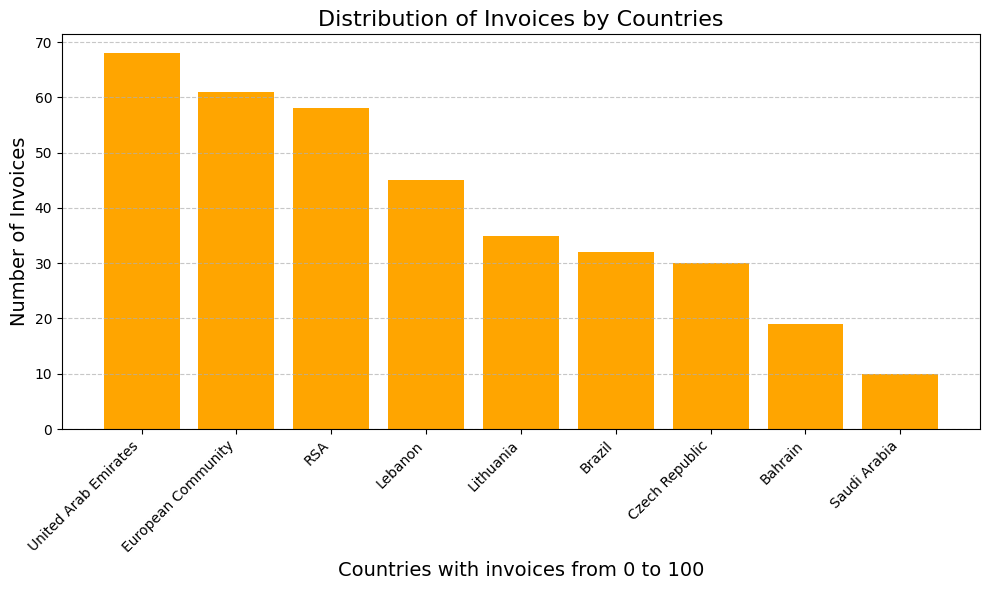

In [19]:
# For countries with invoices from zero to 100
plot_series_subset(country_counts, lower_limit=0, upper_limit=100)

### 2. Groups between 100 and 1000 invoices

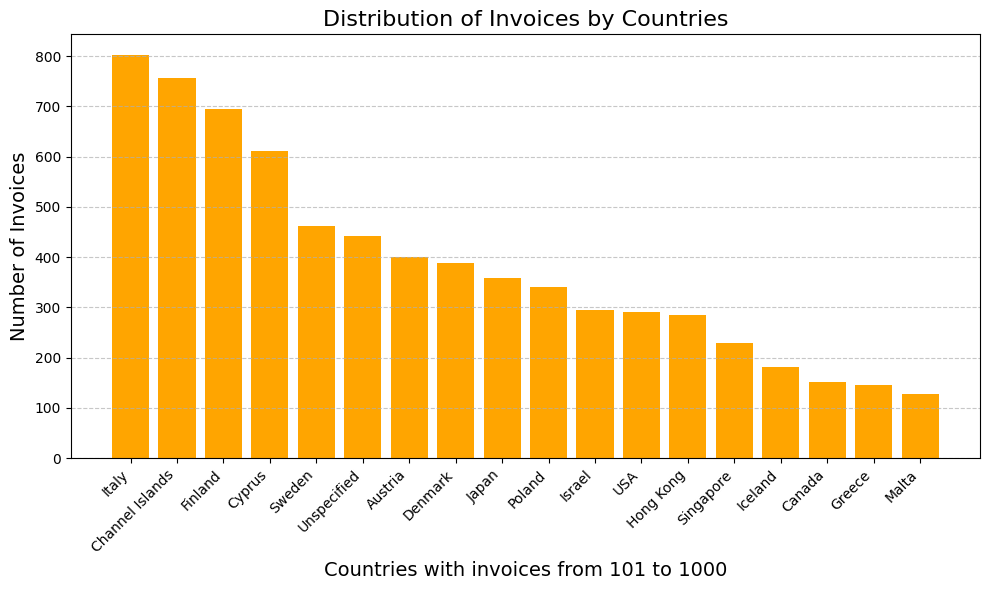

In [20]:
# For countries with invoices from 101 to 1000
plot_series_subset(country_counts, lower_limit=101, upper_limit=1000)

### 3. Groups between 1000 and 10000 invoices

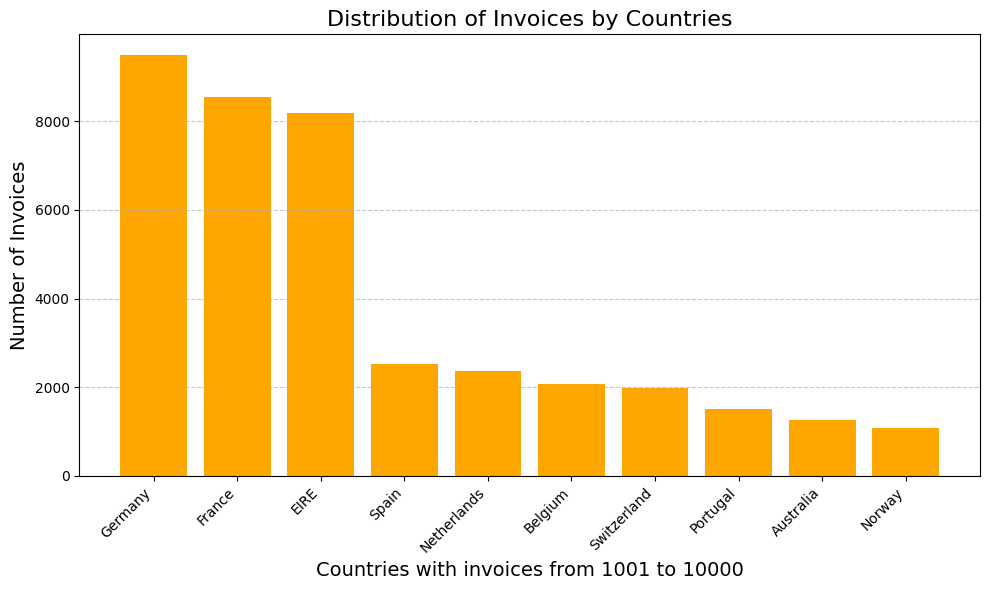

In [21]:
# For countries with invoices from 1001 to 10000
plot_series_subset(country_counts, lower_limit=1001, upper_limit=10000)

The customer location distribution shows:

1. **UK Dominance**: The United Kingdom stands out with a significantly higher number of invoices (almost 500,000) compared to other countries. This suggests a strong UK customer base that might require focused attention and potentially tailored marketing strategies.

2. **European Focus**: The majority of invoices originate from European countries, indicating a strong European customer base. This could be further segmented by region within Europe (e.g., Western Europe, Eastern Europe) for more granular analysis.

3. **Long Tail**: Beyond the UK, there's a long tail of countries with much lower invoice counts. These might represent smaller customer segments that could be grouped together based on geographic proximity, cultural similarities, or other relevant factors.

4. **Unspecified**: The "Unspecified" category requires further investigation. It's crucial to understand why these invoices lack a specific country and determine if they can be categorized based on additional data or cleaning efforts.

## Behavior

### Common Purchase Categories/Products

1. Analyzing Purchase Categories:


We explore potential purchase categories and their frequency by iterating through the 'Description' column. Assuming descriptions might contain category clues, we extract keywords based on word length and alphabetical characters. This is a starting point, and we might need to adjust it for our specific data. We then use Counter to count the occurrences of each extracted category, giving us insights into the most frequently purchased ones.

In [22]:
# Considering that 'Description' column contains category clues
from collections import Counter  # For counting category occurrences (optional)

# Explore common purchase categories (using Description for potential clues)
def analyze_categories(df):
  """
  Analyzes potential purchase categories and identifies frequent items.

  Args:
      df (pandas.DataFrame): The cleaned DataFrame containing purchase data.

  Returns:
      None (prints analysis results to console)
  """

  # Extract potential category keywords from descriptions (optional)
  # This approach might require adjustments based on your data
  categories = []
  for desc in df['Description']:
    words = desc.split()  # Split description into words
    potential_category = [word for word in words if len(word) > 3 and word.isalpha()]  # Filter words with length > 3 and only letters
    if potential_category:
      categories.append(potential_category[0])  # Assuming the first relevant word is the category

  # Count category occurrences (alternative: using groupby)
  if categories:
    category_counts = Counter(categories)
    print("\n**Potential Purchase Categories (from Description):")
    for category, count in category_counts.most_common(10):  # Print top 10 most frequent
      print(f"- {category}: {count} occurrences")
  else:
    print("\n**Unable to extract clear categories from descriptions. Consider alternative methods.**")

2. Understanding Customer Behavior:


To delve into customer behavior, we group the data by the 'CustomerID'. This allows us to analyze spending patterns for each customer. We calculate their total spending by summing the 'UnitPrice' within each customer group. This helps us identify our top spending customers, the ones who contribute the most to overall sales. Additionally, we calculate the most frequent items purchased overall using the 'Description' column. This provides a general picture of the most popular products across all customers. We can further analyze frequent purchases for each individual by grouping by 'CustomerID'.

In [23]:
# Analyze customer behavior (total spending, frequent items)
def analyze_customer_behavior(df):
  """
  Analyzes customer behavior by grouping data and calculating relevant metrics.

  Args:
      df (pandas.DataFrame): The cleaned DataFrame containing purchase data.

  Returns:
      None (prints analysis results to console)
  """

  # Group data by customer ID
  customer_groups = df.groupby('CustomerID')

  # Calculate total spending per customer
  total_spend_per_customer = customer_groups['UnitPrice'].sum()

  # Identify top 5 spending customers
  top_spenders = total_spend_per_customer.sort_values(ascending=False).head(5)

  # Calculate most frequent items purchased by all customers
  # (consider grouping by customer for individual customer analysis)
  all_item_counts = df['Description'].value_counts().head(10)  # Top 10 most frequent items

  # Print analysis results
  print("\n**Analysis of Customer Behavior:**")
  print(f"\n- Top 5 Spending Customers:")
  print(top_spenders)

  print(f"\n- Top 10 Most Frequently Purchased Items:")
  print(all_item_counts)

In [24]:
# Analyzing the cleaned data
analyze_categories(df_cleaned.copy())  # Avoid modifying original data
analyze_customer_behavior(df_cleaned.copy())


**Potential Purchase Categories (from Description):
- JUMBO: 20723 occurrences
- RETROSPOT: 16885 occurrences
- LUNCH: 14873 occurrences
- VINTAGE: 13723 occurrences
- PACK: 13538 occurrences
- PINK: 12224 occurrences
- WOODEN: 8757 occurrences
- DOORMAT: 8346 occurrences
- BLUE: 8206 occurrences
- WHITE: 7564 occurrences

**Analysis of Customer Behavior:**

- Top 5 Spending Customers:
CustomerID
n        1090875.12
14096      41376.33
15098      40278.90
14911      31025.29
12744      25108.89
Name: UnitPrice, dtype: float64

- Top 10 Most Frequently Purchased Items:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
ASSORTED COLOUR BIRD ORNAMENT         1488
SET OF 3 CAKE TINS PANTRY DESIGN      1465
PACK OF 72 RETROSPOT CAKE CASES       1367
LUNCH BAG  BLACK SKULL.               1323
NATURAL SLATE HEART CHALK

### Average Order Value and Frequency

In [25]:
def analyze_order_behavior(df):
  """
  This function analyzes order behavior in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing customer invoice data.

  Returns:
      dict: A dictionary containing the following keys:
          average_order_value (float): Average order value.
          average_orders_per_customer (float): Average number of orders per customer.
          average_daily_orders (float, optional): Average daily orders (if 'InvoiceDate' is available).
  """
  # Calculate total amount
  df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

  # Average order value
  average_order_value = df['Total_Amount'].mean()

  # Order frequency per customer
  order_frequency = df['InvoiceNo'].value_counts()
  average_orders_per_customer = len(df) / len(order_frequency)

  # Order frequency per day (if 'InvoiceDate' available)
  average_daily_orders = None
  if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    # Set 'InvoiceDate' as the index
    df.set_index('InvoiceDate', inplace=True)
    daily_orders = df.resample('D')['InvoiceNo'].count()
    average_daily_orders = daily_orders.mean()

  # Return results as a dictionary
  return {
      "average_order_value": average_order_value,
      "average_orders_per_customer": average_orders_per_customer,
      "average_daily_orders": average_daily_orders
  }

In [26]:
# for our dataset
analyze_order_behavior(df_cleaned.copy())

{'average_order_value': 18.173100157515037,
 'average_orders_per_customer': 21.89262046960648,
 'average_daily_orders': 1430.98128342246}

Based on this we can see a few things:

1. Active and Frequent Customer Base:

The high average order value (around $18) combined with the high average orders per customer (21.89) suggests customers are not just buying once, but making repeat purchases.
The very high average daily orders (1430.98 for a year's data) indicates a very active customer base with frequent transactions.


2. Potential Areas for Further Exploration:

The high daily order volume could be due to a large customer base or frequent smaller purchases. Analyzing order trends over time through visualizations might reveal seasonal patterns or promotional effects.
Customer segmentation based on purchase frequency or order value can help tailor marketing strategies to different customer groups and identify high-value customers for targeted retention efforts.



Overall Insight:

We have a customer base that exhibits characteristics of both high purchase frequency and a tendency for repeat purchases. This suggests a potential for strong customer loyalty and a high customer lifetime value (CLTV). However, to optimize strategies, it's crucial to understand the underlying drivers of the high daily order volume. Analyzing the data further can help us refine customer segmentation and develop targeted marketing and retention programs.

# Time Series Analysis

Based on the insight we gained, we will do an anlysis of daily orders.

## Time Series Analysis of Orders (Daily)

C:\Users\USER\AppData\Local\Temp\ipykernel_8324\1683467953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


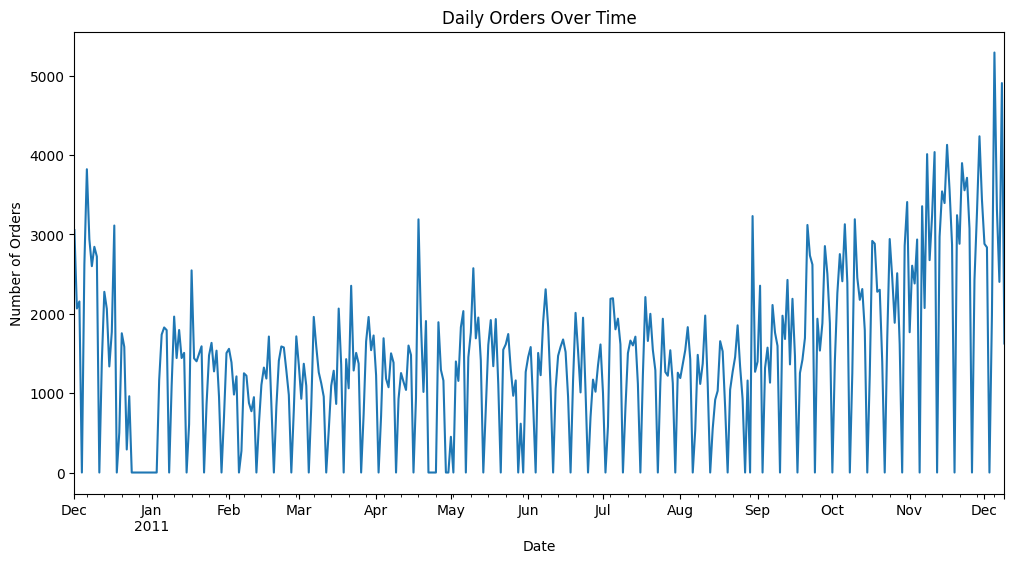

In [27]:
# Using InvoiceDate
if 'InvoiceDate' in df_cleaned.columns:
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
  df_cleaned.set_index('InvoiceDate', inplace=True)
  daily_orders = df_cleaned.resample('D')['InvoiceNo'].count()

  # Plot daily orders
  daily_orders.plot(kind='line', figsize=(12, 6))
  plt.xlabel('Date')
  plt.ylabel('Number of Orders')
  plt.title('Daily Orders Over Time')
  plt.show()


This is too rough. We will do it weekly monthly

## Time Series Analysis of Orders (Weekly)

In [28]:
# Assuming 'InvoiceDate' is in datetime format
if 'InvoiceDate' in df_cleaned.columns:
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
  weekly_orders = df_cleaned.resample('W')['InvoiceNo'].count()

  # Plot weekly orders
  weekly_orders.plot(kind='line', figsize=(12, 6))
  plt.xlabel('Week')
  plt.ylabel('Number of Orders')
  plt.title('Weekly Orders Over Time')
  plt.show()


## Time Series Analysis of Orders (Monthly)

In [29]:
# Using InvoiceDate and making it the index
if 'InvoiceDate' in df_cleaned.columns:
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
  monthly_orders = df_cleaned.resample('M')['InvoiceNo'].count()

  # Plot monthly orders
  monthly_orders.plot(kind='line', figsize=(12, 6))
  plt.xlabel('Month')
  plt.ylabel('Number of Orders')
  plt.title('Monthly Orders Over Time')
  plt.show()


In [30]:
df_cleaned.reset_index()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
535182,2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France
535183,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France
535184,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France
535185,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France


# Segmentation

## Customer Frequency Overview

In [31]:
# Assuming 'InvoiceNo' uniquely identifies an invoice
customer_orders = df_cleaned.groupby('CustomerID')['InvoiceNo'].count()

# Define thresholds for segmentation (adjust based on your data)
frequent_threshold = 10
infrequent_threshold = 2

# Segment customers based on order frequency
frequent_customers = customer_orders[customer_orders >= frequent_threshold]
infrequent_customers = customer_orders[(customer_orders >= infrequent_threshold) & (customer_orders < frequent_threshold)]
very_infrequent_customers = customer_orders[customer_orders < infrequent_threshold]

# Analyze or visualize each segment (e.g., average order value)
print("Number of Frequent Customers:", len(frequent_customers))
print("Number of Infrequent Customers:", len(infrequent_customers))
print("Number of Very Infrequent Customers:", len(very_infrequent_customers))


Number of Frequent Customers: 3782
Number of Infrequent Customers: 512
Number of Very Infrequent Customers: 79


## Segmentation by Purchase Behavior

### Monetary Value

Total amount purchased per customer

In [32]:
# Calculate the total purchase amount per customer
df_cleaned['TotalPurchase'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
customer_monetary_value = df_cleaned.groupby('CustomerID')['TotalPurchase'].sum().reset_index()
customer_monetary_value.columns = ['CustomerID', 'TotalPurchase']

print(customer_monetary_value)

     CustomerID  TotalPurchase
0         12346           0.00
1         12347        4310.00
2         12348        1797.24
3         12349        1757.55
4         12350         334.40
...         ...            ...
4368      18281          80.82
4369      18282         176.60
4370      18283        2045.53
4371      18287        1837.28
4372          n     1447487.53

[4373 rows x 2 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_8324\1846254690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPurchase'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


### Purchase Frequency

Number of invoices per customer

In [48]:
# Calculate the number of invoices per customer
customer_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_frequency.columns = ['CustomerID', 'InvoiceCount']

print(customer_frequency)

     CustomerID  InvoiceCount
0         12346             2
1         12347             7
2         12348             4
3         12349             1
4         12350             1
...         ...           ...
4368      18281             1
4369      18282             3
4370      18283            16
4371      18287             3
4372          n          2256

[4373 rows x 2 columns]


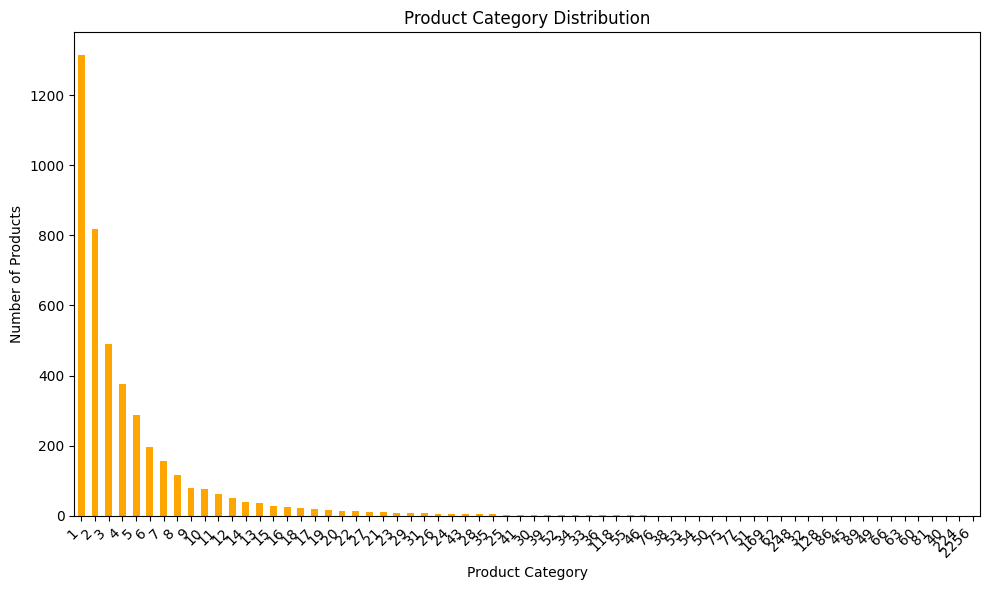

In [53]:
# Get the number of products in each category (unique value counts)
frequency_counts = customer_frequency['InvoiceCount'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
frequency_counts.plot(kind='bar', color='orange')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Recency

Time since last purchase for each customer

In [34]:
# # reset index first
df_cleaned = df_cleaned.reset_index(drop = False)

# Ensure the column 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Set the current_date to the last date in the dataset
current_date = df_cleaned['InvoiceDate'].max()

# Calculate recency
df_cleaned['Recency'] = (current_date - df_cleaned['InvoiceDate']).dt.days

# Group by CustomerID and get the minimum recency per customer
customer_recency = df_cleaned.groupby('CustomerID')['Recency'].min().reset_index()

print(customer_recency)


     CustomerID  Recency
0         12346      325
1         12347        1
2         12348       74
3         12349       18
4         12350      309
...         ...      ...
4368      18281      180
4369      18282        7
4370      18283        3
4371      18287       42
4372          n        0

[4373 rows x 2 columns]


## Segmentation by Product Affinity

### Product Category

In [35]:
def categorize_product(description):
    if 'heart' in description.lower():
        return 'Heart Decor'
    elif 'lantern' in description.lower():
        return 'Lantern'
    elif 'hanger' in description.lower():
        return 'Hanger'
    elif 'bottle' in description.lower():
        return 'Bottle'
    elif 'box' in description.lower():
        return 'Box'
    elif 'holder' in description.lower():
        return 'Holder'
    elif 'hand warmer' in description.lower():
        return 'Hand Warmer'
    elif 'ornament' in description.lower():
        return 'Ornament'
    else:
        return 'Other'

df_cleaned['ProductCategory'] = df_cleaned['Description'].apply(categorize_product)
print(df_cleaned[['Description', 'ProductCategory']])

                                Description ProductCategory
0        WHITE HANGING HEART T-LIGHT HOLDER     Heart Decor
1                       WHITE METAL LANTERN         Lantern
2            CREAM CUPID HEARTS COAT HANGER     Heart Decor
3       KNITTED UNION FLAG HOT WATER BOTTLE          Bottle
4            RED WOOLLY HOTTIE WHITE HEART.     Heart Decor
...                                     ...             ...
535182          PACK OF 20 SPACEBOY NAPKINS           Other
535183         CHILDREN'S APRON DOLLY GIRL            Other
535184        CHILDRENS CUTLERY DOLLY GIRL            Other
535185      CHILDRENS CUTLERY CIRCUS PARADE           Other
535186        BAKING SET 9 PIECE RETROSPOT            Other

[535187 rows x 2 columns]


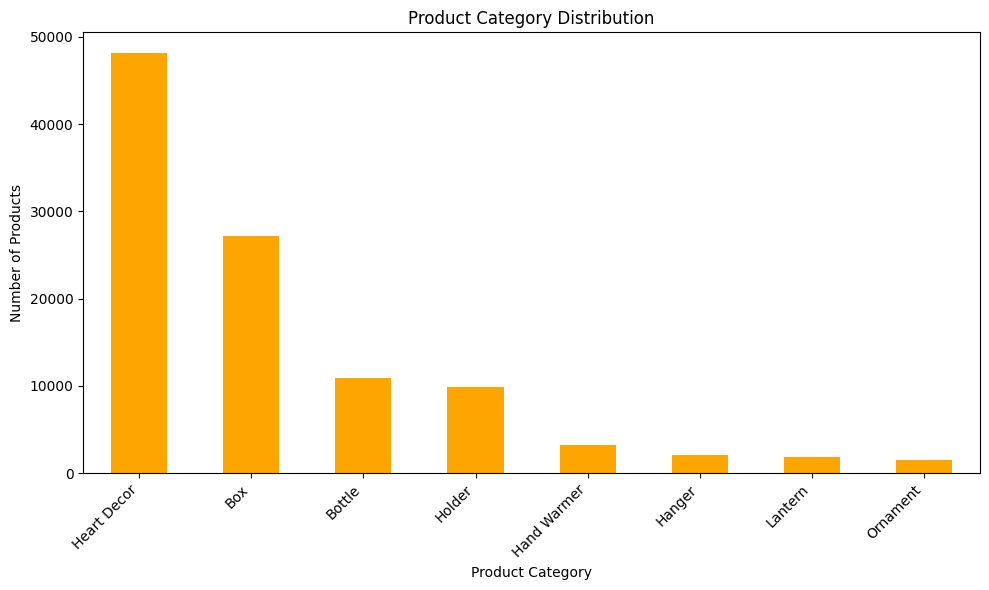

In [46]:
# remove Other from the list
categories = df_cleaned[df_cleaned['ProductCategory'] != 'Other']

# Get the number of products in each category (unique value counts)
product_category_counts = categories['ProductCategory'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
product_category_counts.plot(kind='bar', color='orange')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Frequently Bought Together

In [37]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a basket matrix
basket = (df_cleaned
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert quantities to 1 and 0 (using map)
basket_sets = basket.map(lambda x: 1 if x > 0 else 0)

# Try a lower minimum support (adjust as needed)
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Generate association rules, handle potential empty DataFrame
if frequent_itemsets.shape[0] > 0:
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
  print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
  print("No frequent itemsets found with the current minimum support.")

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


## Segmentation by Country

In [38]:
# Segment by country
customer_country = df_cleaned.groupby('CustomerID')['Country'].first().reset_index()
print(customer_country)

     CustomerID         Country
0         12346  United Kingdom
1         12347         Iceland
2         12348         Finland
3         12349           Italy
4         12350          Norway
...         ...             ...
4368      18281  United Kingdom
4369      18282  United Kingdom
4370      18283  United Kingdom
4371      18287  United Kingdom
4372          n  United Kingdom

[4373 rows x 2 columns]


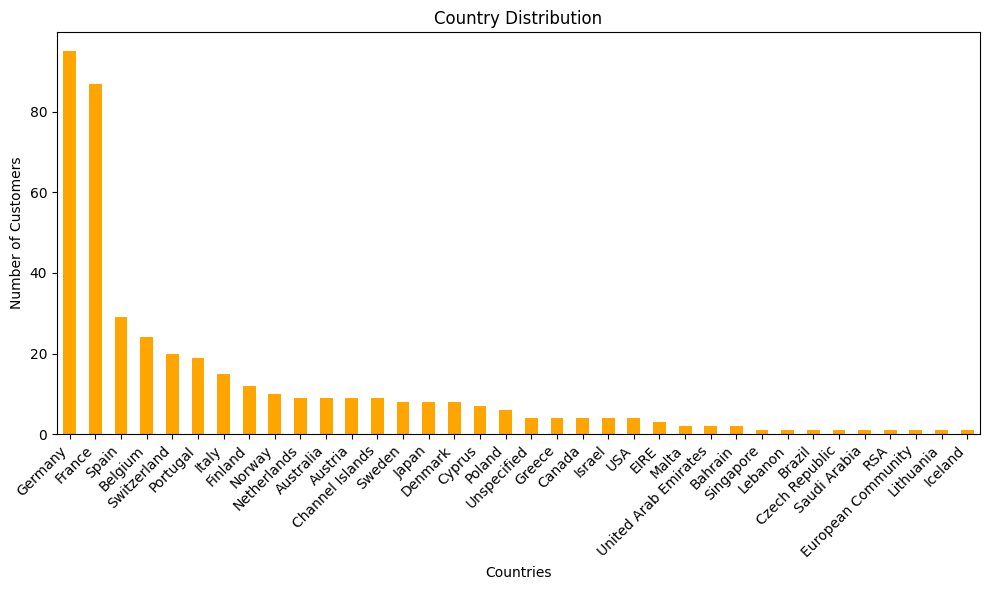

In [45]:
# remove United Kingdom
customer_country = customer_country[customer_country['Country'] != 'United Kingdom']

# Get the number of products in each category (unique value counts)
country_category_counts = customer_country['Country'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
country_category_counts.plot(kind='bar', color='orange')
plt.title("Country Distribution")
plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Combining Segmentation Strategies

In [40]:
# Combine monetary value, frequency, and recency
customer_behavior = customer_monetary_value.merge(customer_frequency, on='CustomerID').merge(customer_recency, on='CustomerID')

# Combine with product categories and country
customer_behavior = customer_behavior.merge(customer_country, on='CustomerID')

print(customer_behavior)

     CustomerID  TotalPurchase  InvoiceCount  Recency         Country
0         12346           0.00             2      325  United Kingdom
1         12347        4310.00             7        1         Iceland
2         12348        1797.24             4       74         Finland
3         12349        1757.55             1       18           Italy
4         12350         334.40             1      309          Norway
...         ...            ...           ...      ...             ...
4368      18281          80.82             1      180  United Kingdom
4369      18282         176.60             3        7  United Kingdom
4370      18283        2045.53            16        3  United Kingdom
4371      18287        1837.28             3       42  United Kingdom
4372          n     1447487.53          2256        0  United Kingdom

[4373 rows x 5 columns]


# Feature Engineering

In [41]:
from sklearn.preprocessing import StandardScaler

# Calculate total spend per invoice
df_cleaned['TotalSpend'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Set the current_date to the last date in the dataset
current_date = df_cleaned['InvoiceDate'].max()

# Calculate Recency
df_cleaned['Recency'] = (current_date - df_cleaned['InvoiceDate']).dt.days
customer_recency = df_cleaned.groupby('CustomerID')['Recency'].min().reset_index()

# Calculate Frequency
customer_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate Monetary
customer_monetary = df_cleaned.groupby('CustomerID')['TotalSpend'].sum().reset_index()

# Merge RFM features into a single DataFrame
customer_rfm = customer_recency.merge(customer_frequency, on='CustomerID').merge(customer_monetary, on='CustomerID')
customer_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Feature Transformation (Scaling)
scaler = StandardScaler()
customer_rfm_scaled = scaler.fit_transform(customer_rfm[['Recency', 'Frequency', 'Monetary']])


# Model Development

In [42]:
from sklearn.cluster import KMeans

# Segmentation Model Development (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_rfm['Cluster'] = kmeans.fit_predict(customer_rfm_scaled)


# Model Validation and Refinement

In [43]:
from sklearn.metrics import silhouette_score

# Evaluate the model
silhouette_avg = silhouette_score(customer_rfm_scaled, customer_rfm['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.6938121212874073


# Conclusion

Cluster Summary:
   Cluster    Recency    Frequency      Monetary
0        0   39.44965     6.128385  2.361559e+03
1        1    0.00000  2256.000000  1.447488e+06
2        2  247.36129     1.885714  4.756446e+02


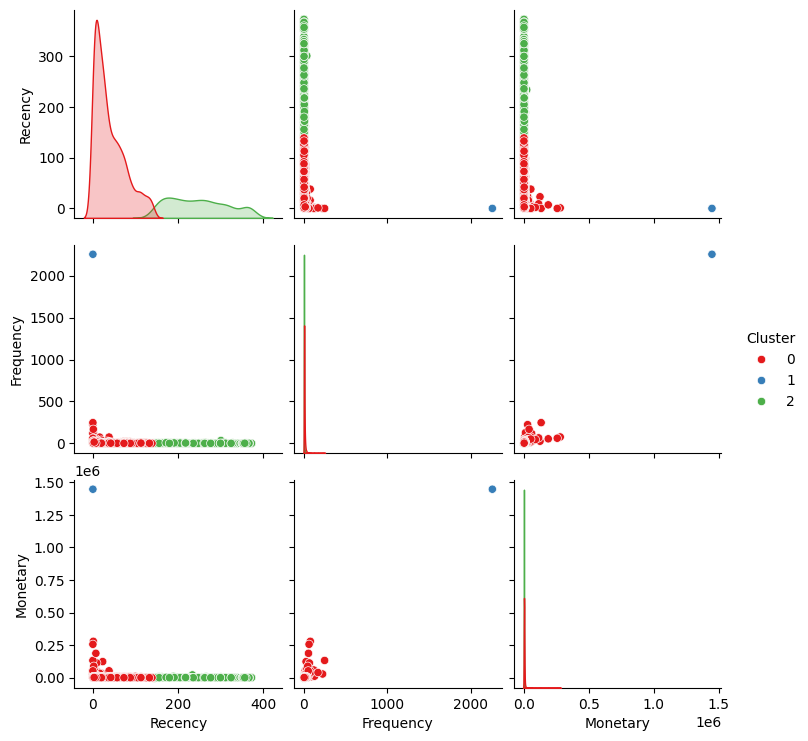

In [44]:
# Summarize the findings
summary = customer_rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']].groupby('Cluster').mean().reset_index()
print("Cluster Summary:")
print(summary)

sns.pairplot(customer_rfm, hue='Cluster', palette='Set1')
plt.show()
